# Gráficos en Python

En este archivo se describen algunas opciones para graficar en Python. Más allá de las características específicas de cada gráfico (barras, histograma, circular, líneas, dispersión), sus partes accesorias (títulos, nombres de los ejes, marcas en los ejes o *ticks*) se configuran de igual manera.

El archivo con los datos usado para este Jupyter Notebook se puede conseguir en: https://www.presupuestoabierto.gob.ar/sici/destacado-a-que-se-destina-el-gasto#

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [266]:
df = pd.read_csv("a-que-se-destina-el-gasto.csv") # importamos datos
df['Ejercicio'] = df['Ejercicio'].str.replace(',', '').astype(int)
df['Ejecutado'] = df['Ejecutado'].str.replace(',', '').astype(float)
df['Presupuestado'] = df['Presupuestado'].str.replace(',', '').astype(float)  # Reemplazamos el separador de miles para poder convertir el tipo de dato
df

,Ejercicio,Finalidad,Funcion,Presupuestado,Ejecutado,% Ejecutado
0,2023,ADMINISTRACION GUBERNAMENTAL,Información y Estadística Básicas,16577.10,15109.06,91.14
1,2023,ADMINISTRACION GUBERNAMENTAL,Administración Fiscal,26186.41,23390.44,89.32
2,2023,ADMINISTRACION GUBERNAMENTAL,Control de la Gestión Pública,29874.03,29516.41,98.80
3,2023,SERVICIOS ECONOMICOS,Seguros y Finanzas,41512.95,41228.58,99.31
4,2023,SERVICIOS DE DEFENSA Y SEGURIDAD,Inteligencia,66480.81,64453.86,96.95
5,2023,SERVICIOS ECONOMICOS,"Comercio, Turismo y Otros Servicios",101675.23,81244.30,79.91
6,2023,SERVICIOS SOCIALES,Trabajo,123897.40,117657.44,94.96
7,2023,SERVICIOS ECONOMICOS,Ecología y Desarrollo Sostenible,126587.40,119254.75,94.21
8,2023,SERVICIOS DE DEFENSA Y SEGURIDAD,Sistema Penal,152013.86,147412.03,96.97
9,2023,ADMINISTRACION GUBERNAMENTAL,Legislativa,167872.14,166555.77,99.22


Lo que usaremos para explicar las características de la graficación es el gráfico de barras, tanto horizontal como vertical.

Para graficar, en este caso, es necesario agrupar los datos.

In [267]:
grouped_data = df.groupby('Finalidad')['Ejecutado'].sum().reset_index()
grouped_data

,Finalidad,Ejecutado
0,ADMINISTRACION GUBERNAMENTAL,2349060.47
1,DEUDA PUBLICA,3472800.84
2,SERVICIOS DE DEFENSA Y SEGURIDAD,1710841.61
3,SERVICIOS ECONOMICOS,5647579.07
4,SERVICIOS SOCIALES,24845207.08


## Configuraciones básicas

- *plt.figure(figsize)* permite configurar el tamaño del gráfico en pulgadas (ancho, largo)

- En *Seaborn*, *barplot* puede ser usado tanto para un gráfico de barras horizontales como verticales, según como se coloquen los argumentos *x* e *y*.

- *plt.show()* muestra el gráfico solamente.


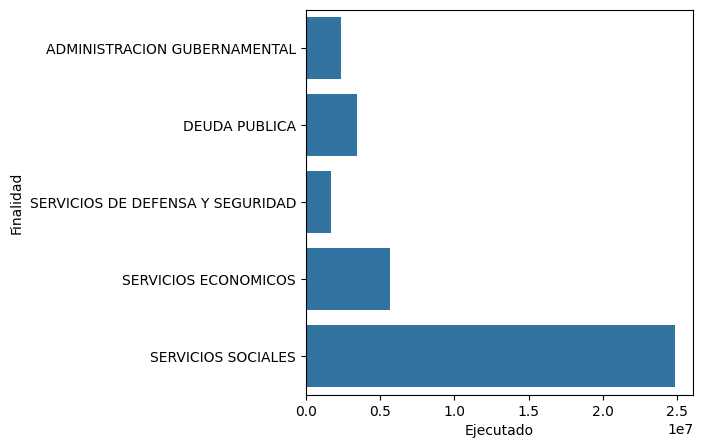

In [268]:
# Crear gráfico de barras usando Seaborn
plt.figure(figsize=(5, 5))
sns.barplot(x='Ejecutado', y='Finalidad', data=grouped_data)
plt.show()


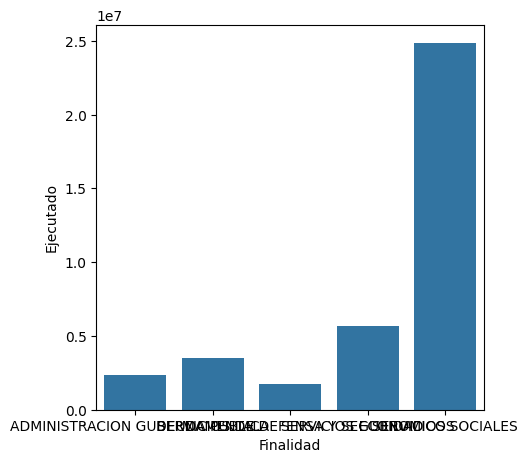

In [269]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Finalidad', y='Ejecutado', data=grouped_data)
plt.show()

En el caso de *plt*, *bar* solo sirve para hacer gráficos de barras verticales. Para los horizontales, se usa *barh*. Los nombres de los argumentos en cada caso cambian ligeramente.

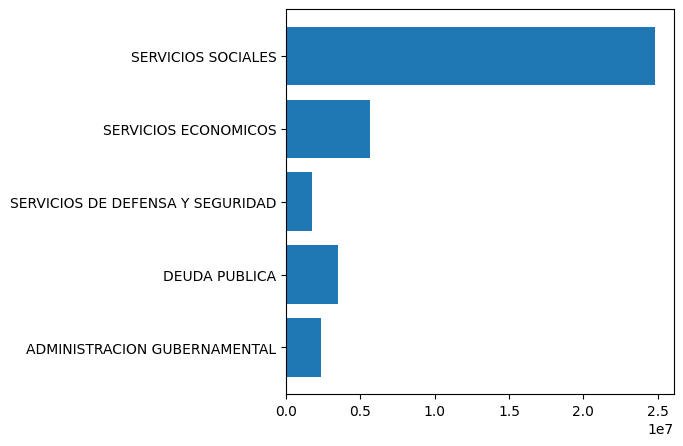

In [270]:
plt.figure(figsize=(5, 5))
plt.barh(y= grouped_data['Finalidad'], width= grouped_data['Ejecutado'])
plt.show()

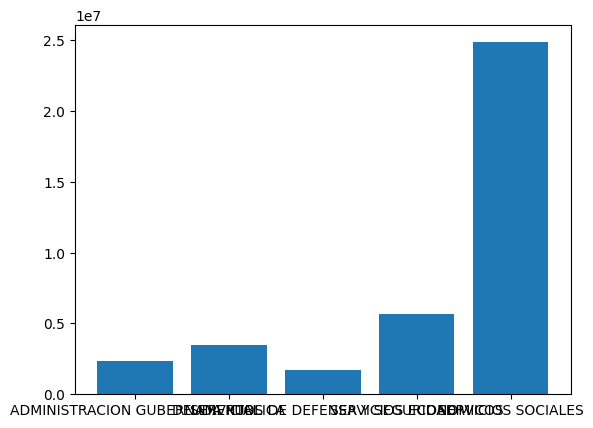

In [271]:
plt.bar(x = grouped_data['Finalidad'], height = grouped_data['Ejecutado'])
plt.show()

Como ven, acá hay muchas cosas por cambiar y agregar:

- Títulos.

- En el caso de *plt*, epígrafe a los ejes (*label*).

- Configurar los nombres de las categorías (*ticks*): tamaño, orientación, etc.

- Colores.

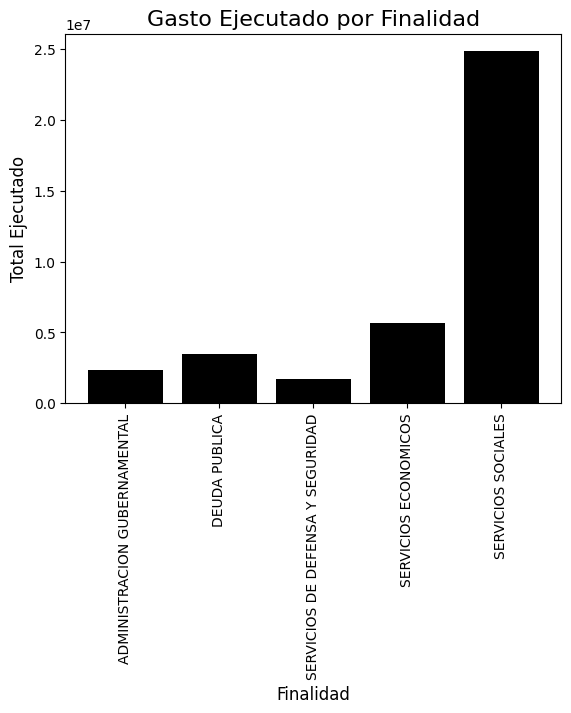

In [272]:
plt.bar(x = grouped_data['Finalidad'], height = grouped_data['Ejecutado'], color = 'black')

# Rotar los labels en el eje x a 90 grados
plt.xticks(rotation=90)

# Añadir etiquetas y título
plt.xlabel('Finalidad', fontsize=12) # Fontsize es tamaño de fuente
plt.ylabel('Total Ejecutado', fontsize=12)
plt.title('Gasto Ejecutado por Finalidad', fontsize=16)

# Mostrar gráfico
plt.show()

En cuanto a color, podemos agregar uno predeterminado ('red', 'black', 'green', etc.) o bien el códgio hexadecimal. En el siguiente enlace tienen un selector de color con el corrspondiente código: https://htmlcolorcodes.com/es/

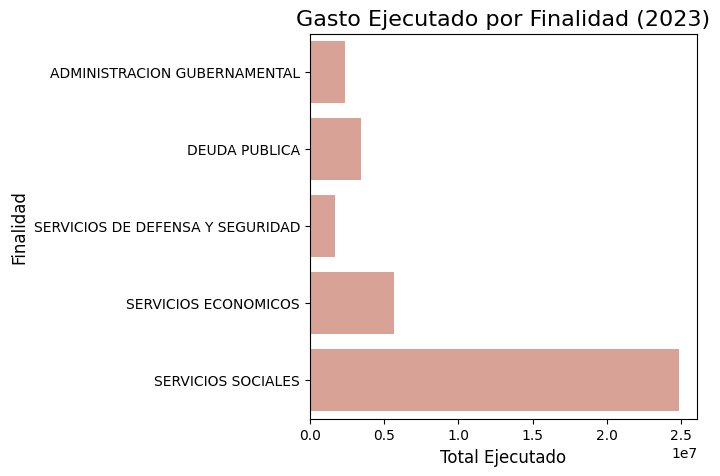

In [273]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Ejecutado', y='Finalidad', data=grouped_data, color = '#E39B8B')

plt.title('Gasto Ejecutado por Finalidad (2023)', fontsize=16)
plt.xlabel('Total Ejecutado', fontsize=12)
plt.ylabel('Finalidad', fontsize=12)

plt.show()

*Seaborn* nos permite configurar una paleta de colores. Visiten el siguiente enlace para saber más: https://seaborn.pydata.org/tutorial/color_palettes.html

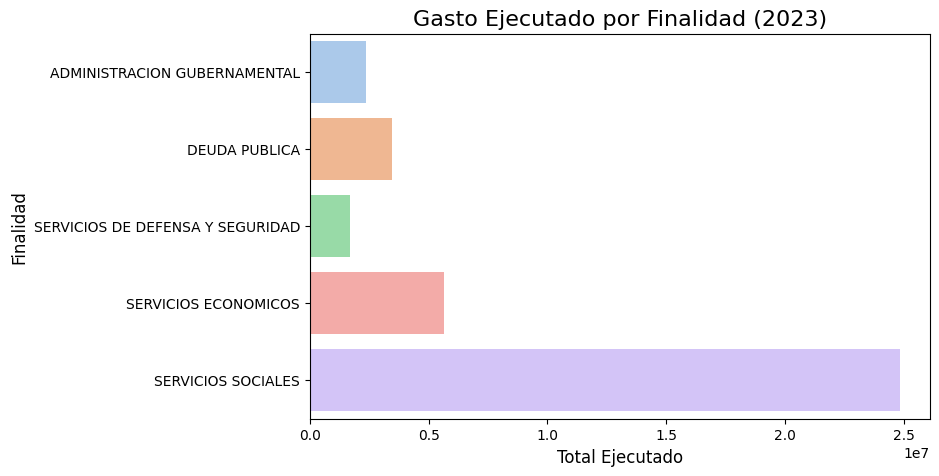

In [274]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Ejecutado', y='Finalidad', data=grouped_data, palette = 'pastel', hue = 'Finalidad')

plt.title('Gasto Ejecutado por Finalidad (2023)', fontsize=16)
plt.xlabel('Total Ejecutado', fontsize=12)
plt.ylabel('Finalidad', fontsize=12)

plt.show()

El argumento *hue* debe ser colocado junto a *palette* para indicar sobre qué variable debe ser aplicada la paleta. En el anterior caso fue sobre la misma variable que dependiente, pero podría no ser así. Observen el siguiente ejemplo.

In [275]:
imagen_positiva = pd.DataFrame({
    'Candidato': ['Juan Pérez', 'María González', 'Carla Gutiérrez'],
    'Imagen positiva': [40.5, 51.3, 36.5],
    'Partido político': ['Partido A', 'Partido A', 'Partido B']
})
imagen_positiva

,Candidato,Imagen positiva,Partido político
0,Juan Pérez,40.5,Partido A
1,María González,51.3,Partido A
2,Carla Gutiérrez,36.5,Partido B


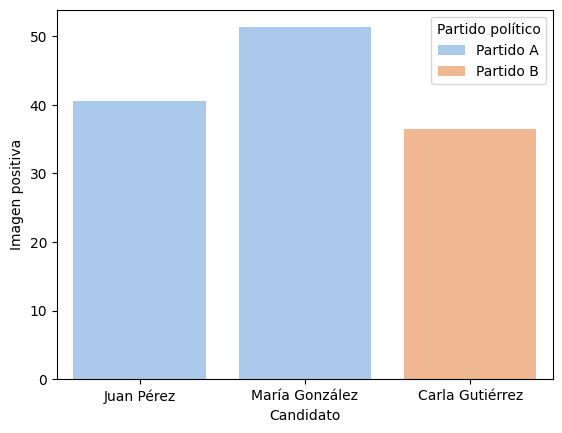

In [276]:
sns.barplot(x = 'Candidato', y = 'Imagen positiva', data = imagen_positiva, palette = 'pastel', hue = 'Partido político')
plt.show()

## Otras configuraciones sobre *labels* y *ticks*

Podemos agregar espacios *pad* en todos los "accesorios" del gráfico, así como configurar su ubicación (*loc*). La ubicación tiene como referencia el área del gráfico, no el área de toda la figura. Para los textos horizontales las opciones son *left*, *center*, *right*. Para los textos en vertical, *bottom*, *center*, *top*.

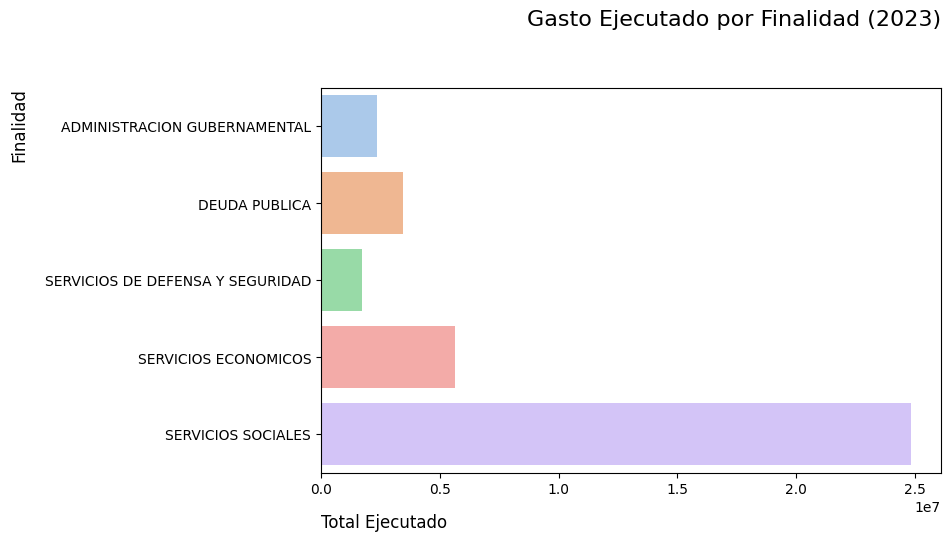

In [277]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Ejecutado', y='Finalidad', data=grouped_data, palette = 'pastel', hue = 'Finalidad')

plt.title('Gasto Ejecutado por Finalidad (2023)', fontsize=16, pad = 45, loc = 'right')
plt.xlabel('Total Ejecutado', fontsize=12, labelpad= 12, loc = 'left')
plt.ylabel('Finalidad', fontsize=12, labelpad= 12, loc = 'top')

plt.show()

Más elementos que pueden configurarse:

- Ancho (o alto) de columnas (o barras): en *plt* se agrega el argumento *width* para gráficos de barras verticales y *height* para gráficos de barras horizonatales. En *sns* siempre se debe usar *width*.

- Color de los bordes: se usa el argumento *edgecolor*.

- Saturación de color: en *plt*, se usa el argumento *alpha*. Los valores posibles se ubican en el rango [0, 1].

- Alineación de los *ticks*: en *plt* se usa el argumento *edge* al construir el gráfico.

- Rotación de los *ticks*: muy útil para los diagramas de barras verticales con muchas categorías. Se usa *plt.xticks(rotation = )* o *plt.yticks(rotation = )* según corresponda.

- Tipo de letra: se utiliza el argumento *fontname*.

- Se puede poner el texto que se quiera en los *labels*, incluso si el gráfico automáticamente genera uno, como es el caso de *sns*.



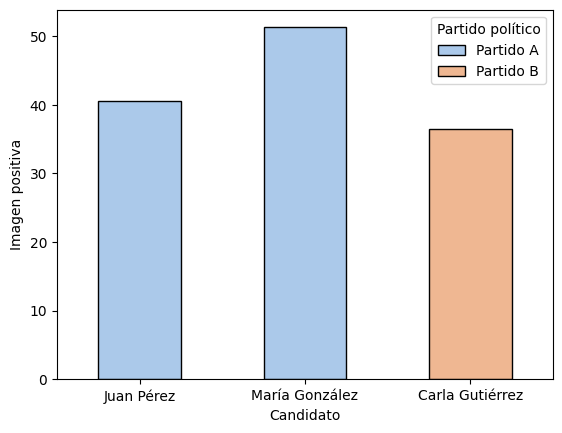

In [278]:
sns.barplot(x = 'Candidato', y = 'Imagen positiva', data = imagen_positiva, palette = 'pastel', hue = 'Partido político', width = 0.5, edgecolor = 'black')
plt.show()

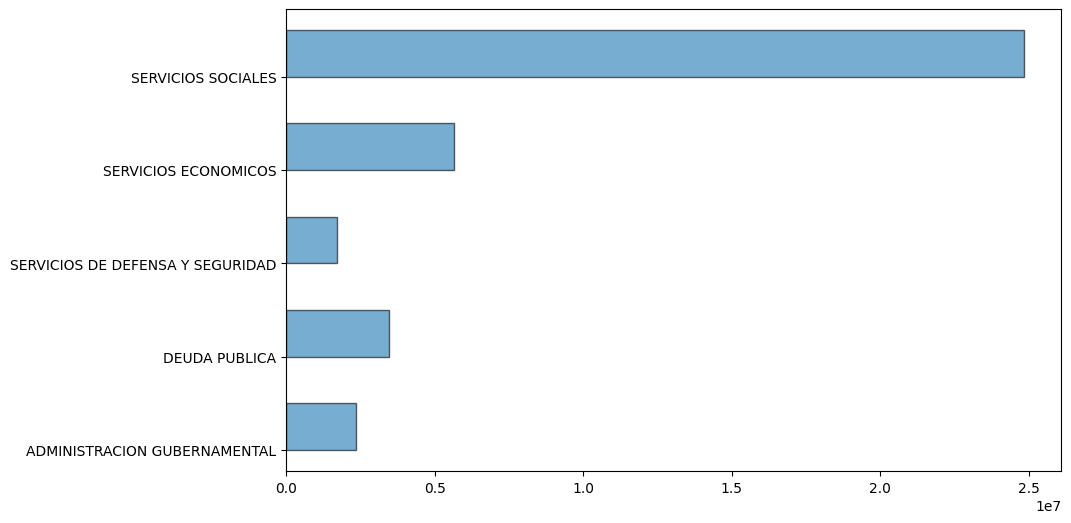

In [279]:
plt.figure(1, figsize=(10, 6))
plt.barh(y = grouped_data['Finalidad'], width = grouped_data['Ejecutado'], height= 0.5, edgecolor = 'black', alpha = 0.6, align = 'edge') 
plt.show()

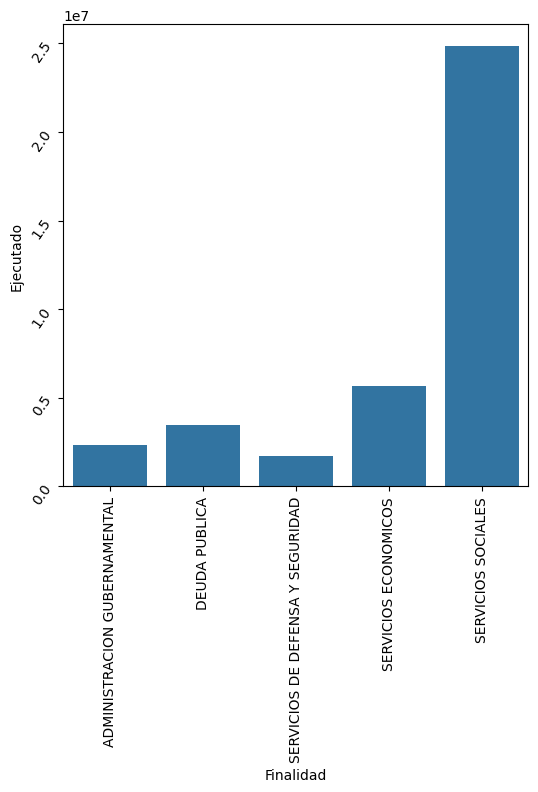

In [280]:
plt.figure(figsize= (6,6))
sns.barplot(data= grouped_data, x= 'Finalidad', y='Ejecutado')

plt.xticks(rotation = 90)
plt.yticks(rotation = 55)

plt.show()

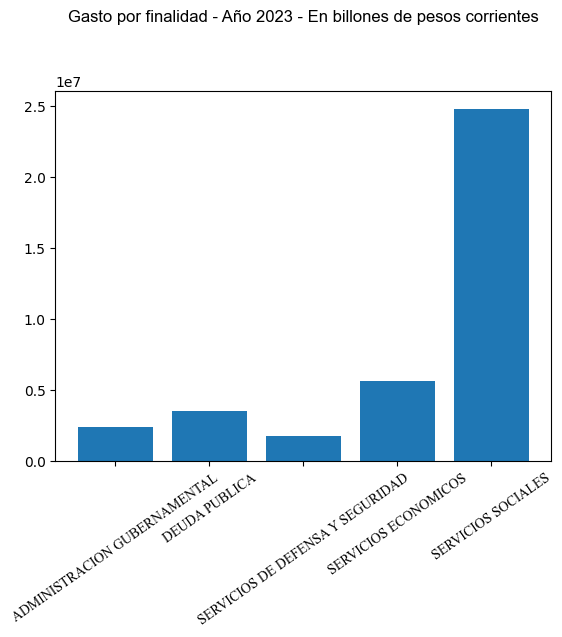

In [281]:
plt.bar(x= grouped_data['Finalidad'], height= grouped_data['Ejecutado'])
plt.title('Gasto por finalidad - Año 2023 - En billones de pesos corrientes', pad = 50, fontname= 'Arial')
plt.xticks(rotation = 35, fontname = 'Times New Roman')
plt.show()

### Ordenar explícitamente por valores

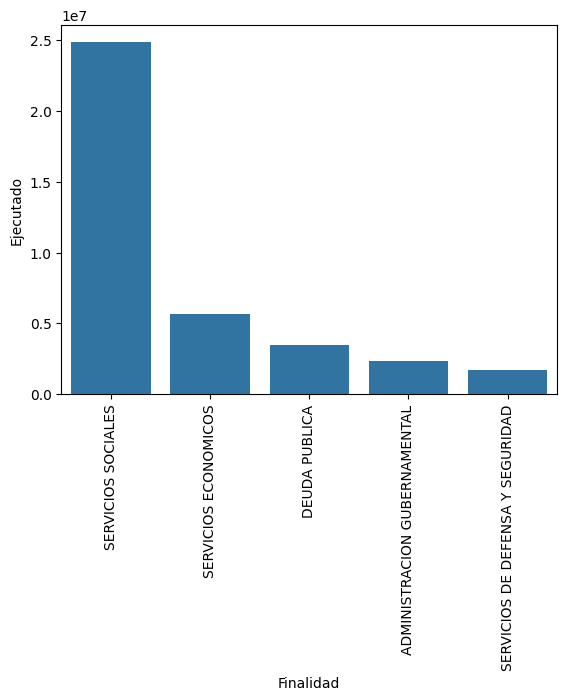

In [289]:
grouped_data = grouped_data.sort_values(by='Ejecutado', ascending=False)

sns.barplot(data= grouped_data, x = 'Finalidad', y = 'Ejecutado')
plt.xticks(rotation = 90)

plt.show()


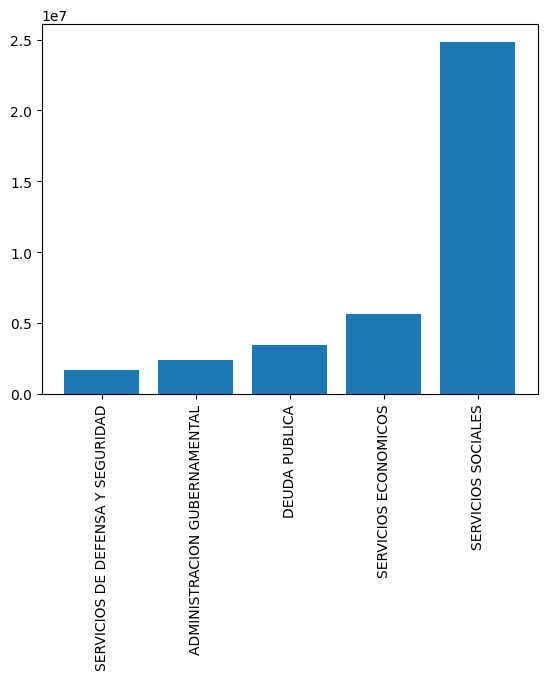

In [283]:
plt.bar(x= grouped_data.sort_values(by= ['Ejecutado'])['Finalidad'], height= grouped_data.sort_values(by= ['Ejecutado'])['Ejecutado']) # De esta forma no hace falta crear otro df
plt.xticks(rotation= 90)
plt.show()

## Múltiples criteirios de agrupación y posterior graficación

Veamos como graficar con criterios superpuestos. Para empezar, usaremos *groupby()* para ver cómo podemos agrupar los datos. Una explicación más detallada se encuentra en el archivo *Manejo_de_Series_y_DataFrames.ipynb*.

In [284]:
df = df[['Finalidad', 'Funcion', 'Ejecutado']] # Achicamos el df a las columnas que nos interesan
grouped_data2 = df.groupby(['Finalidad'])['Ejecutado'].sum()
grouped_data2

Finalidad
ADMINISTRACION GUBERNAMENTAL         2349060.47
DEUDA PUBLICA                        3472800.84
SERVICIOS DE DEFENSA Y SEGURIDAD     1710841.61
SERVICIOS ECONOMICOS                 5647579.07
SERVICIOS SOCIALES                  24845207.08
Name: Ejecutado, dtype: float64

El código anterior lo que hace es agrupar por finalidad, y luego selecciona una columna para hacer una operación. Pero en realidad, el resultado de groupby es un conjunto de df, uno por grupo. Por lo cual, podemos iterar sobre el objeto que devuelve *groupby()*. Por ejemplo, podemos imprimir las claves de cada grupo.

In [285]:
for key, group in df.groupby(['Finalidad']):
    print(key) #cada key es el grupo, cada group es un DataFrame de ese grupo

ADMINISTRACION GUBERNAMENTAL
DEUDA PUBLICA
SERVICIOS DE DEFENSA Y SEGURIDAD
SERVICIOS ECONOMICOS
SERVICIOS SOCIALES


C:\Users\Equipo\AppData\Local\Temp\ipykernel_11340\1130936043.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in df.groupby(['Finalidad']):


Imprimamos cada df

In [286]:
for key, group in df.groupby(['Finalidad']):
    print(group, '\n -------------------------------------------') #cada key es el grupo, cada group es un DataFrame de ese grupo

                       Finalidad                            Funcion  Ejecutado
0   ADMINISTRACION GUBERNAMENTAL  Información y Estadística Básicas   15109.06
1   ADMINISTRACION GUBERNAMENTAL              Administración Fiscal   23390.44
2   ADMINISTRACION GUBERNAMENTAL      Control de la Gestión Pública   29516.41
9   ADMINISTRACION GUBERNAMENTAL                        Legislativa  166555.77
13  ADMINISTRACION GUBERNAMENTAL       Dirección Superior Ejecutiva  179799.31
14  ADMINISTRACION GUBERNAMENTAL              Relaciones Exteriores  231757.64
19  ADMINISTRACION GUBERNAMENTAL                           Judicial  755451.51
21  ADMINISTRACION GUBERNAMENTAL              Relaciones Interiores  947480.33 
 -------------------------------------------
        Finalidad                       Funcion   Ejecutado
27  DEUDA PUBLICA  Servicio de la Deuda Pública  3472800.84 
 -------------------------------------------
                           Finalidad             Funcion  Ejecutado
4   SERVI

C:\Users\Equipo\AppData\Local\Temp\ipykernel_11340\3885622639.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in df.groupby(['Finalidad']):


Y ahora ya tenemos todo para graficar.

C:\Users\Equipo\AppData\Local\Temp\ipykernel_11340\2140581173.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in df.groupby(['Finalidad']):


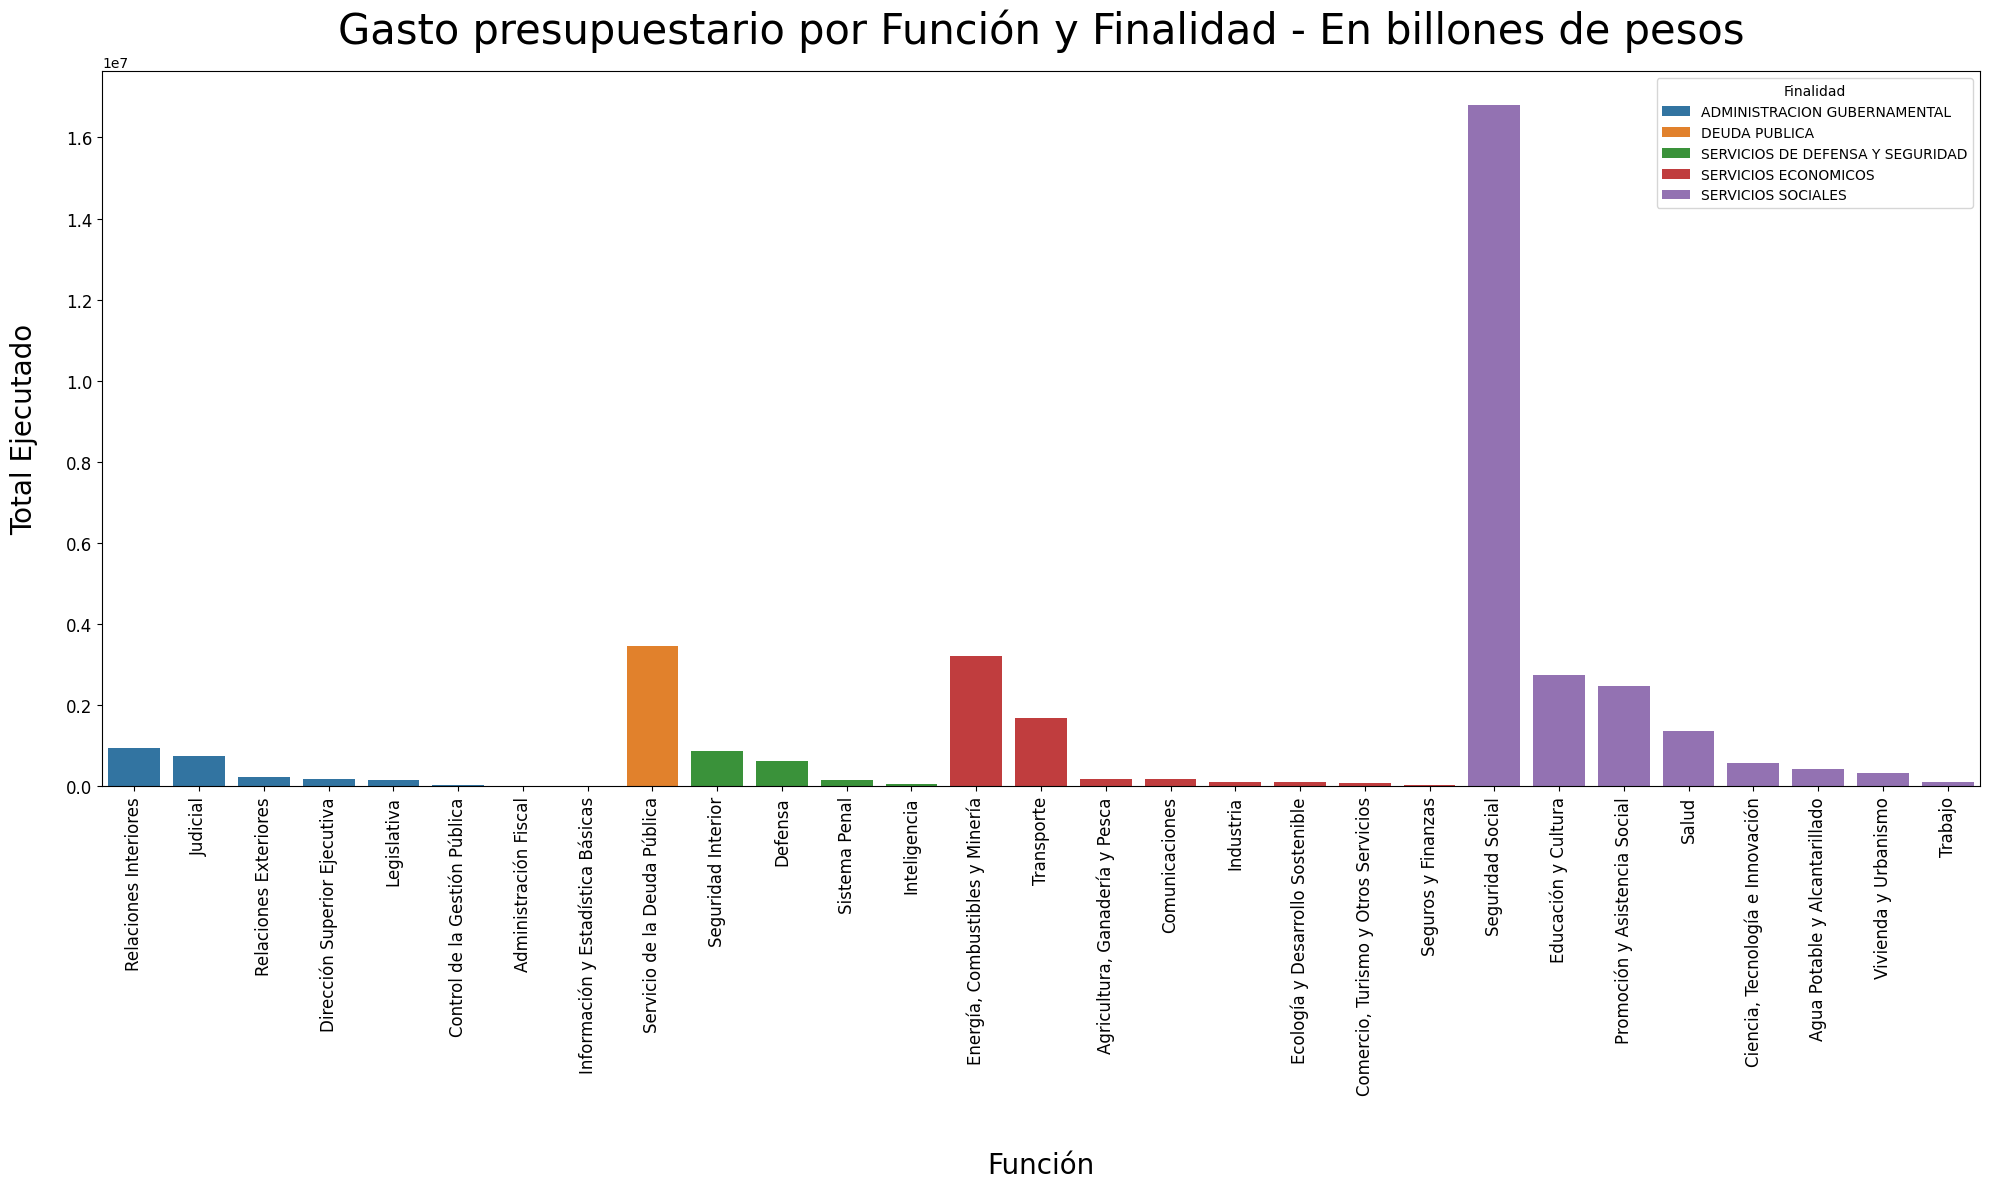

In [287]:
plt.figure(figsize=(20, 12))
for key, group in df.groupby(['Finalidad']):
    a = group.sort_values(by='Ejecutado', ascending=False) # Cada "group" es un df, pero cada "a" es un nuevo df con los valores de "group" ordenados por 'Ejecutado'
    sns.barplot(data=a, x= 'Funcion', y='Ejecutado', label = key)  # Esto hace el grafico multinivel. 'Label' es la leyenda de colores.

# Características del gráfico
plt.title('Gasto presupuestario por Función y Finalidad - En billones de pesos', fontsize = 30, pad = 20)
plt.xlabel('Función', labelpad= 40, fontsize = 20)
plt.ylabel('Total Ejecutado', labelpad = 20, fontsize = 20)
plt.legend(title='Finalidad') #  Cuadrito con el código de colores
plt.xticks(rotation=  90, fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout() # Ajusta los parámetros de tamaño para una mejor disposición. Pero no siempre da buenos resultados
plt.show()

Por último, vemos la configuración de algunos detalles adicionales.

C:\Users\Equipo\AppData\Local\Temp\ipykernel_11340\1406088701.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df.groupby(['Finalidad']):


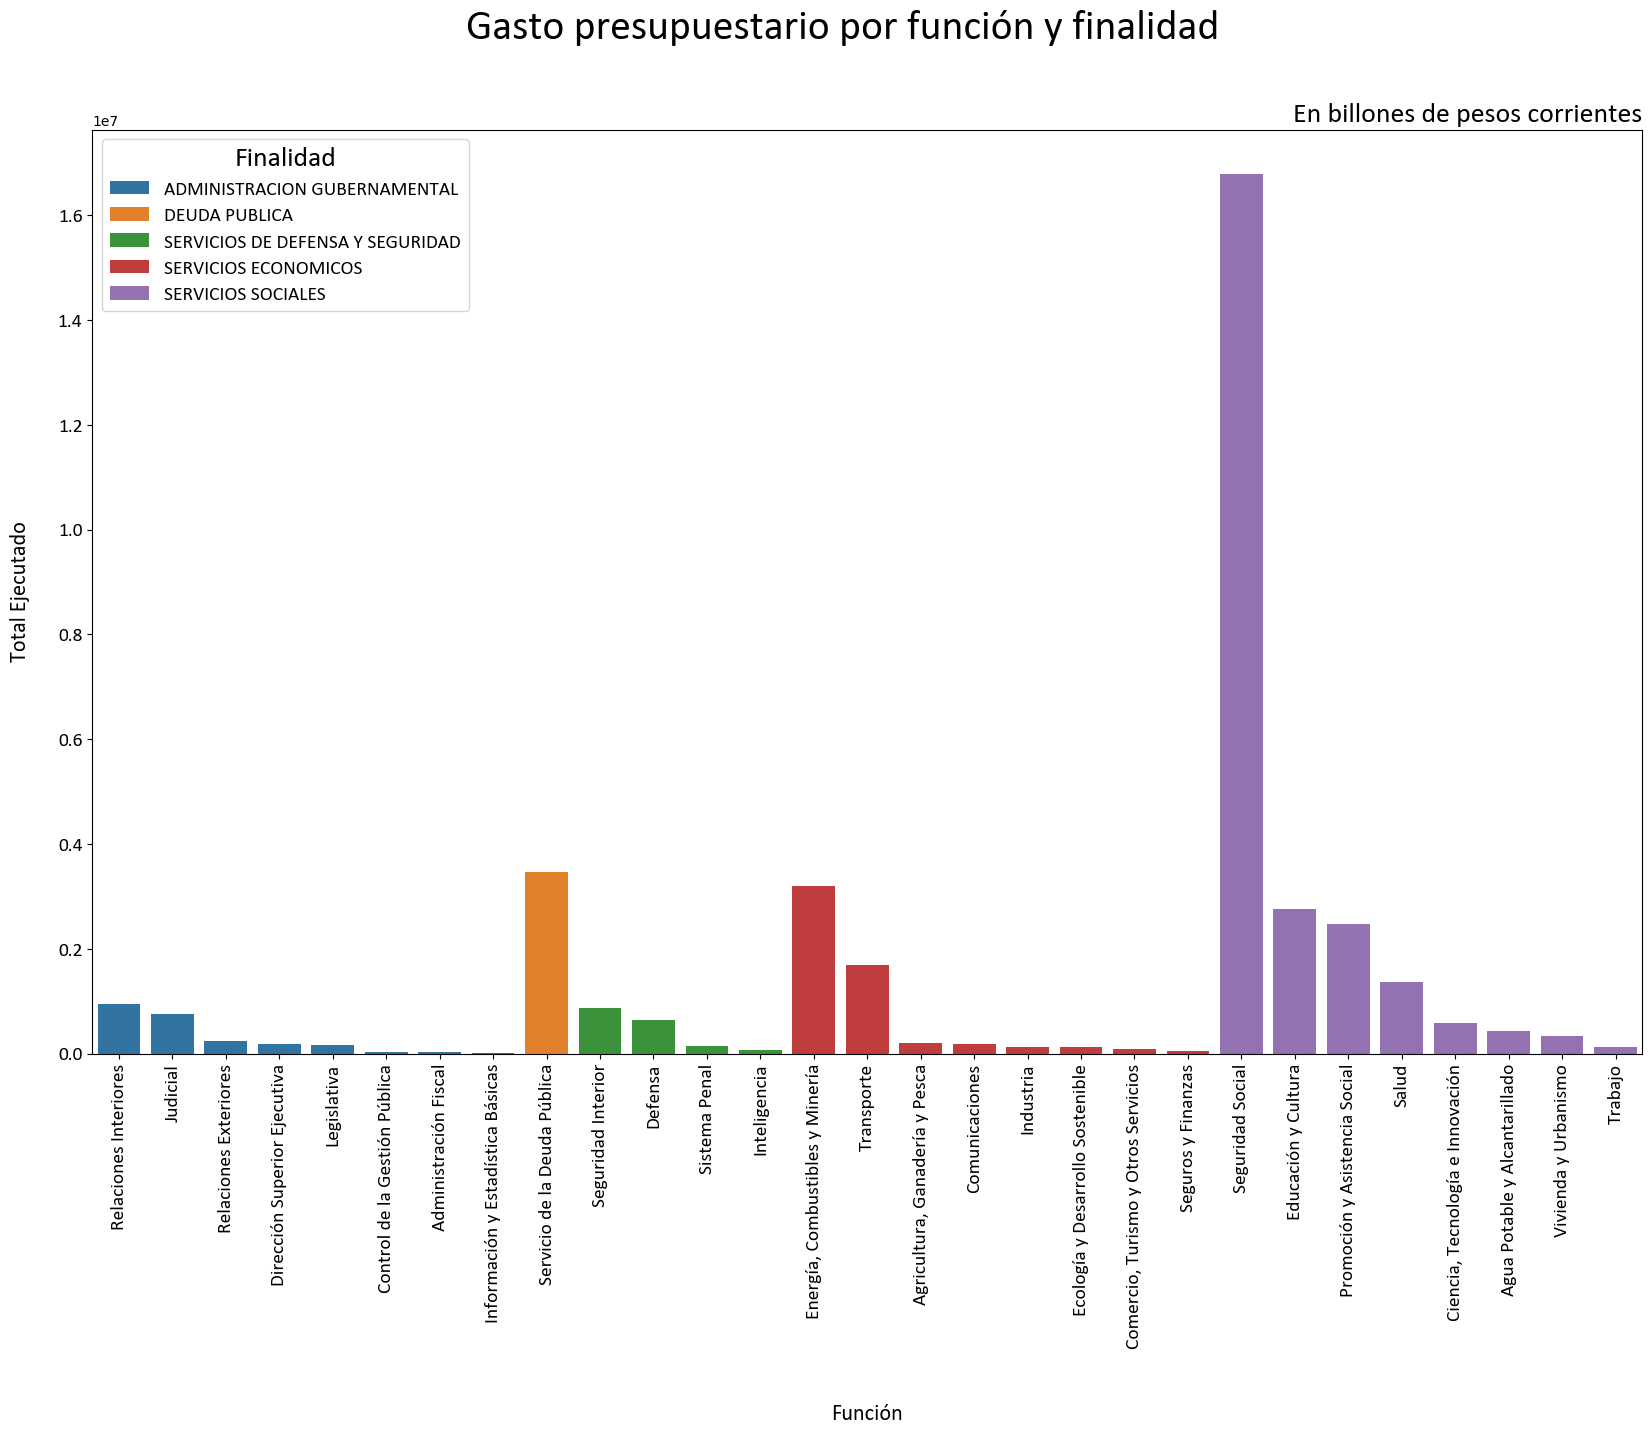

In [288]:
plt.figure(figsize=(20,12))
for key, grp in df.groupby(['Finalidad']):
    sns.barplot(grp.sort_values(by='Ejecutado', ascending= False), x='Funcion', y= 'Ejecutado', label= key)
    
    plt.suptitle('Gasto presupuestario por función y finalidad', fontsize = 30, fontname = 'Calibri') # Agregamos esto para dejar un título general más corto
    plt.title('En billones de pesos corrientes', fontsize = 20, fontname = 'Calibri', loc = 'right')

# Características del gráfico
plt.xlabel('Función', labelpad= 40, fontsize = 16, fontname = 'Calibri')
plt.ylabel('Total Ejecutado', labelpad= 20, fontsize = 16, fontname = 'Calibri')


plt.legend(title='Finalidad', prop={'family': 'Calibri', 'size': 14}, title_fontproperties= {'family':'Calibri', 'size': 20},
           loc = 'upper left') # cuadrito con el código de colores
'title_pontproperties'

plt.xticks(rotation= 90, fontsize = 14, fontname = 'Calibri')
plt.yticks(fontsize = 14, fontname = 'Calibri')

plt.show()